# Convolutional Neural Networks
* Convolution Computation:
Convolution computation is a mathematical operation that is used to apply a filter (also known as a kernel) to an input signal or image. The filter is a small matrix of weights that is typically much smaller than the input signal or image. During convolution computation, the filter is slid over the input signal or image, and at each location, the dot product between the filter and the overlapping portion of the input is computed. The result of each dot product is a single number that is placed in the output matrix. This process is repeated for every location in the input signal or image.

* Padding:
Padding refers to adding extra rows and columns of zeros around the edges of an input signal or image. Padding is often used in convolutional neural networks to ensure that the output size of a convolution operation is the same as the input size. The amount of padding required depends on the size of the filter and the stride (see below).

* Stride:
Stride refers to the number of steps the filter takes when sliding over the input signal or image. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 means the filter moves two pixels at a time. Stride affects the output size of the convolution operation. A larger stride will result in a smaller output size.

* Receptive Field:
The receptive field is the area of the input signal or image that affects a particular neuron in a convolutional neural network. In other words, it is the area of the input that the neuron "sees" through the filter. The receptive field grows with each convolutional layer in the network, allowing the network to capture increasingly complex and abstract features and spatial relationships. The receptive field size is determined not only by the kernel sizes in each layer but also by the stride values and the network's depth.

* Channel:
A channel is a set of feature maps that are generated by applying a set of filters to the input. In a color image, there are typically three channels corresponding to the red, green, and blue color channels. In a convolutional neural network, each layer can have multiple channels, each of which captures different features of the input.

* Kernel:
A kernel (also known as a filter or convolutional matrix) is a small matrix of weights that is used to perform operations such as blurring, sharpening, edge detection, and feature extraction on an image.(Determines the local region of the input data that convolution operation will process at each step) The kernel size refers to the dimensions of the matrix(individual convolutional layer). 
  * For example, a 3x3 kernel has a width of 3 and a height of 3, and contains 9 elements. The appropriate kernel size depends on the task at hand and the characteristics of the image being processed. Generally, smaller kernel sizes (e.g., 3x3 or 5x5) are used for simpler features and larger kernel sizes (e.g., 7x7 or 9x9) are used for more complex features. However, larger kernel sizes also require more computational resources and may lead to overfitting if the model has insufficient training data.


## Determine Hyperparameters size
* Padding: Choose padding that maintains the desired output size and avoids excessive border effects. Same-padding is often used to maintain the spatial dimensions of the input data. 
 * Same-padding, the padding is calculated based on the kernel size and the stride used in the convolution. The formula to determine the amount of padding required, based on kernel size w and stride S: P = ((S - 1) * W + K - S) / 2, where W is the input size. In same padding, the padding values can be zeros (zero-padding) or replicate the border values of the input data. This choice depends on the specific application and the nature of the input data.

* Stride: A stride of 1 or 2 is common. Smaller strides preserve more spatial information, while larger strides reduce computation and output size. Stride values should be chosen based on the desired trade-off between spatial resolution and computational complexity.

* Receptive field: Choose a network architecture that results in a sufficiently large receptive field to capture the relevant spatial relationships in the input data. Deeper networks typically have larger receptive fields.
 The receptive field size increases as you go deeper into the network. Here's a method to calculate the receptive field size for a neuron in layer L, assuming the network has L convolutional layers:
 1. Initialize the receptive field size (RF) to 1.
 2. Iterate through each layer (l) from the input layer (l = 0) to the target layer (l = L):
   a. Calculate the jump (J) in the receptive field size at layer l as the product of strides in all previous layers: J_l = J_(l-1) * s_l, where s_l is the stride at layer l. For the input layer (l = 0), set J_0 = 1.
   b. Update the receptive field size: RF_l = RF_(l-1) + (K_l - 1) * J_l, where K_l is the kernel size at layer l. For the input layer (l = 0), set RF_0 = 1.
  After iterating through all the layers up to layer L, the value of RF_L represents the receptive field size of a neuron in layer L.
  
  * Here's an example:
  Consider a CNN with the following layers:
  1. Convolutional layer with kernel size 3 and stride 1.
  2. Convolutional layer with kernel size 5 and stride 2.
  3. Convolutional layer with kernel size 3 and stride 1.
  To calculate the receptive field size for a neuron in the third layer, follow these steps:
    1. Initialize RF = 1.
    2. For layer 1: J_1 = J_0 * s_1 = 1 * 1 = 1, RF_1 = RF_0 + (K_1 - 1) * J_1 = 1 + (3 - 1) * 1 = 3.
    3. For layer 2: J_2 = J_1 * s_2 = 1 * 2 = 2, RF_2 = RF_1 + (K_2 - 1) * J_2 = 3 + (5 - 1) * 2 = 11.
    4. For layer 3: J_3 = J_2 * s_3 = 2 * 1 = 2, RF_3 = RF_2 + (K_3 - 1) * J_3 = 11 + (3 - 1) * 2 = 15.\
  The receptive field size for a neuron in the third layer is 15.


* Channel: The number of output channels in a convolutional layer should be chosen based on the complexity of the features to be learned. More channels allow the network to learn a richer set of features, but increase the computational cost and model complexity.
  * multi-channel refers to the presence of multiple feature dimensions in the input data or the output feature maps. Each channel represents a distinct set of features or information within the data. Multi-channel data is typically represented as a 3D tensor, with the height, width, and number of channels as its dimensions.For example, in the case of color images, there are three channels: red, green, and blue (RGB). Each channel holds the intensity values of the respective color component, and together they form a complete color image. Similarly, in grayscale images, there is only one channel representing the intensity of the gray value.\
  In a CNN, multi-channel is also relevant to the intermediate feature maps generated by the convolutional layers. Each layer can have multiple input and output channels, allowing the network to learn and extract multiple features concurrently. For instance, a convolutional layer may have 64 output channels, each capturing a distinct feature or pattern in the input data.\
  The convolution operation in a CNN can handle multi-channel input data by using 3D kernels, where the depth of the kernel matches the number of input channels. The kernel is applied to each input channel separately, and the results are summed up to produce a single output channel. To obtain multiple output channels, the CNN uses multiple 3D kernels, each producing one output channel.

* Kernel: Smaller kernels (e.g., 3x3) are more common as they have fewer parameters and are computationally cheaper. Larger kernels can capture more complex patterns but increase the computational cost and may require more training data. Often, multiple layers of small kernels are used to achieve the same effect as a single layer of large kernels, but with fewer parameters and reduced computational cost.
  * Determine kernel size:
  1. Start with a smaller size and gradually increase it until the desired level of performance is achieved: grid search or random search, which involve evaluating the performance of different models with different kernel sizes on a validation set.
  2. Pre-trained models or transfer learning, which can help avoid the need for fine-tuning the kernel size altogether.

* Output size:
To calculate the output size of a convolutional layer, you need to consider the input size, kernel size, stride, and padding for both height and width. Let's assume the kernel height is K_h, kernel width is K_w, padding for height is P_h, and padding for width is P_w. Then, you can calculate the output height (H_out) and output width (W_out) as follows:\
$$
H_{out} = \left\lfloor\frac{h_{in} + 2 * P_h - K_h}{s_h}\right\rfloor + 1
$$
$$
W_{out} = \left\lfloor\frac{w_{in} + 2 * P_w - K_w}{s_w}\right\rfloor + 1
$$
These formulas give the output dimensions for a convolutional layer, considering the input dimensions (h_in, w_in), kernel dimensions (K_h, K_w), stride (s_h, s_w), and padding (P_h, P_w). Note that the results of the divisions should be rounded down to the nearest integer if they are not integers. For example, if you have an input size of 28x28, a 3x3 kernel, stride of 1 for both height and width, and padding of 1 for both height and width (same padding), the output size will be ((28 + 2 * 1 - 3) / 1) + 1 = 28, the output size will be 28x28, which maintains the same spatial dimensions as the input size.





## Multi-channels

The number of channels doesn't directly affect the spatial dimensions (height and width) of the output in a convolutional layer, but it does influence the depth (the third dimension) of the output.

For a convolutional layer with multi-channel input, the output size is determined by:

1. **The size of the input** (height, width, and number of input channels).

2. **The size of the kernel** (height, width, and depth, where the depth of the kernel should match the number of input channels).

3. **The stride** (the step size at which the kernel is applied across the input).

4. **The padding** (additional rows/columns of pixels added around the input).

5. **The number of kernels** (each kernel generates one output channel).

The spatial dimensions (height and width) of the output are given by the same formula we used earlier:
$$
H_{out} = ((h_{in} + 2 * P_h - K_h) / s_h) + 1
$$
$$
W_{out} = ((w_{in} + 2 * P_w - K_w) / s_w) + 1
$$

where:
- h_in, w_in are the height and width of the input.
- K_h, K_w are the height and width of the kernel.
- P_h, P_w are the height and width of the padding.
- s_h, s_w are the stride for height and width.

The depth (or number of output channels) of the output is equal to the number of kernels applied. So if a convolutional layer applies 64 kernels to the input, then the output will have 64 channels.

Note: The above calculation assumes that you are using standard convolution, not depthwise or separable convolution. The latter types would have different ways of dealing with multi-channel input.


## Mini-batch
In machine learning, particularly in the context of training neural networks, a mini-batch is a small subset of the entire training dataset. Instead of feeding the whole dataset at once (batch gradient descent) or single data points (stochastic gradient descent) to the network during training, we feed a small batch of data points.

This mini-batch gradient descent approach tries to balance the advantages of both batch gradient descent and stochastic gradient descent. It aims to:

1. Minimize the noise in the gradient estimation, which is present in stochastic gradient descent.
2. Speed up the computation process using vectorized operations and require less memory than batch gradient descent.

The mini-batch size is a hyperparameter that you can tune. Common choices are powers of 2, like 32, 64, 128, 256, and so on, which often work well in practice due to how memory is allocated in most computers.

When you use a mini-batch of size m during training, you would divide the entire dataset into N/m mini-batches (assuming N is divisible by m), and each mini-batch gets passed through the network, updating the weights each time. This process of passing all the mini-batches through the network constitutes one epoch of training.

Choosing an appropriate mini-batch size is important. Too large, and you may exceed your system's memory capacity and not fully utilize the noise reduction advantage of stochastic gradient descent. Too small, and you don't fully utilize the speed benefits of vectorized operations, and you may end up with noisy gradient estimates.


Determining the appropriate mini-batch size for training a neural network is mostly a matter of trial and error, as it can depend on several factors:

1. **Memory Constraints**: The larger the mini-batch size, the more memory you need. A larger mini-batch size means that more training examples are processed together, which requires more memory to store the intermediate values for backpropagation. You may need to limit your mini-batch size to avoid running out of memory.

2. **Computational Efficiency**: Larger mini-batches can take advantage of vectorized operations, which can speed up the computation. However, there are diminishing returns. At a certain point, increasing the mini-batch size won't speed up the training proportionally and might even slow down the training due to the overhead of transferring larger amounts of data to the GPU.

3. **Model Performance**: The mini-batch size can impact the model's performance. Larger mini-batches can lead to more stable and accurate gradient estimates, which can help the model to converge faster. However, smaller mini-batches introduce more noise in the gradient estimates, which can have a regularizing effect and sometimes help the model to escape from shallow local minima and find a better solution.

4. **Generalization**: Some research has suggested that smaller mini-batch sizes may lead to models that generalize better, although the reasons for this are not fully understood.

Given these considerations, a common approach is to start with a small mini-batch size (e.g., 32) and then gradually increase it until you start seeing diminishing returns in terms of computational efficiency and model performance. Some practitioners follow a "1-2-4-8" rule, which is to start with a mini-batch size of 1, and if the GPU memory is not exhausted, then double the size and try again until the memory limit is hit or the performance starts to degrade.

Please note that the best mini-batch size can depend on the specific dataset, model, and hardware setup, so it's usually a good idea to experiment with different values to find the one that works best for your specific case.

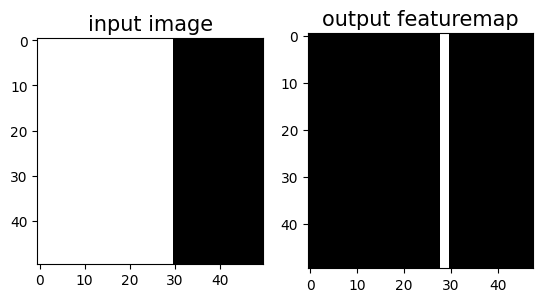

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

# Create the weight tensor for the convolutional layer
# Shape [cout, cin, kh, kw]
w=torch.tensor([1,0,-1],dtype=torch.float32).view(1,1,1,3)

# Create the convolutional layer, set out_channels, kernel_size, and initial weights
# The kernel_size = [1, 3] means kh = 1, kw = 3
# When creating the convolutional layer, specify the method for initializing parameters through the weight property
# The initialization method here is to initialize the convolution parameter from numpy.ndarray
conv=nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1,3))
with torch.no_grad():
  conv.weight=nn.Parameter(w)

# Create the input image, the pixel value of the left side of the picture is 1, the pixel value of the right side is 0
img = np.ones([50,50], dtype='float32')
img[:, 30:] = 0.
# Adjust the shape of the picture to the form of [N, C, H, W]
x = img.reshape([1,1,50,50])
# Convert numpy.ndarray to tensor in PyTorch
x = torch.from_numpy(x)
# Use the convolution operator on the input image
y = conv(x)
# Convert the output tensor to numpy.ndarray
out = y.detach().numpy()

f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
# The output data shape of the convolution operator Conv2D is in the form of [N, C, H, W]
# Here N, C = 1, the output data shape is [1, 1, H, W], which is a 4-dimensional array
# But the drawing function plt.imshow only accepts 2-dimensional arrays when drawing gray images
# Eliminate dimensions of size 1 through numpy.squeeze function
plt.imshow(out.squeeze(), cmap='gray')
plt.show()




This code is creating a simple one-channel convolution operation on an image, where the left half of the image has pixel intensity 1 and the right half has intensity 0. The convolution operation has a kernel size of 3 and is initialized with weights [1, 0, -1]. This filter is commonly used for edge detection, so the output feature map shows high activation at the edge in the middle of the image.

The weights [1, 0, -1] define a very simple filter or kernel often used for edge detection in image processing.

The idea behind these weights is to highlight rapid changes or gradients in the intensity of adjacent pixels, which often correspond to edges. If you imagine convolving this filter across a 1D signal (or along a single row or column of an image), it essentially computes a discrete difference operation.

Specifically, for a three-pixel segment in the image with intensities [a, b, c]:

The left weight (1) multiplies the intensity of the left pixel (a).
The middle weight (0) multiplies the intensity of the middle pixel (b).
The right weight (-1) multiplies the intensity of the right pixel (c).
The result of this operation is a * 1 - b * 0 - c * 1 = a - c.

In the context of an image:

If a = c, the intensity does not change from pixel a to pixel c, so the result is 0, indicating no edge.
If a < c, the intensity increases from pixel a to pixel c, so the result is negative, indicating an edge where the intensity increases.
If a > c, the intensity decreases from pixel a to pixel c, so the result is positive, indicating an edge where the intensity decreases.
Thus, this simple filter can detect changes in intensity, or "edges", in an image or signal. The filter is also considered a high-pass filter because it lets through high-frequency changes (rapid changes in intensity) and suppresses low-frequency changes (slow changes in intensity).

The weights of a convolutional kernel (also known as filters) in a Convolutional Neural Network (CNN) are learned during the training process, which involves feeding the network training data and adjusting the weights based on the error the network produces on its predictions.

Initially, the weights of the convolutional kernels are typically initialized with small random values (using methods like Gaussian initialization, Xavier initialization, or He initialization, among others). As training data is fed into the network and forward propagated, the network makes predictions based on these initial weights.

The difference between the network's prediction and the actual label of the data is computed as an error using a loss function. This error is then backpropagated through the network using a method called gradient descent, which adjusts the weights of the network in a way that makes the error smaller.

In the case of a CNN, this means that the weights of the convolutional kernels are adjusted during training. Over many iterations of this process, the network learns to adjust its weights to minimize the error it produces on the training data.

In the specific case of the weights [1,0,-1] you mentioned, this is a handcrafted filter commonly used for edge detection in image processing, not a learned filter. These weights were chosen based on the mathematical property of differentiation that can highlight changes (edges in images). However, a trained CNN can learn similar filters if they are useful for minimizing the loss function on the training data.

Finally, note that the learning rate, which controls how much the weights are adjusted during each update, is another crucial hyperparameter in this process. Too high of a learning rate might cause the weights to change too drastically and overshoot optimal values, while too low of a learning rate might make the training process very slow or cause the weights to get stuck in suboptimal values.

`nn.Conv2d` is a class in the PyTorch library, and it is used to apply a 2D convolution operation on an input signal composed of several input planes (often referred to as input channels).

Here is a breakdown of the parameters that `nn.Conv2d` takes:

- `in_channels` (int): This is the number of input channels that the input to this layer will have. For instance, a color image would have 3 input channels (red, green, and blue), while a grayscale image would have 1 input channel.

- `out_channels` (int): This is the number of output channels (i.e., the number of convolutional filters) that the convolutional layer will learn. 

- `kernel_size` (int or tuple): The size of the convolutional kernel. This could be a single integer to specify a square kernel (equal height and width), or a tuple of two integers for a rectangular kernel (height, width).

- `stride` (int or tuple, optional): The stride is the step size that the convolutional kernel takes as it slides over the input image. This could be a single integer (for a square stride) or a tuple of two integers (for a rectangular stride). The default value is 1.

- `padding` (int or tuple, optional): Padding is added to the input to control the output size. It can either be 'valid' (0 padding) or 'same' (padding such that the output size is the same as input size). The default is 0.

- `dilation` (int or tuple, optional): This is the spacing between the kernel points; it is used for dilated convolution/dilated conv. The default is 1.

- `groups` (int, optional): This controls the connections between input and output channels. By default, groups is set to 1, and all input channels are convolved to all output channels. If groups = 2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels, and producing half the output channels.

- `bias` (bool, optional): If set to True (default), the layer will learn an additive bias for each output channel.

Note: In PyTorch, the weights of the Conv2d layer are initialized by default with Kaiming uniform initialization, which is suitable for ReLU activations.

Here is an example of how to declare a Conv2d layer:

```python
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
```

This defines a 2D convolutional layer that takes as input a tensor with 3 channels (e.g., a color image), applies 64 filters of size 3x3, slides the filters across the input image with a stride of 1 (both horizontally and vertically), and uses padding of 1 pixel on all sides of the input tensor.

The output of this layer would be a tensor with 64 channels. The height and width of the output tensor would depend on the height and width of the input tensor, but with a stride of 1 and padding of 1, they would be the same as the input if the input's height and width are divisible by the stride.

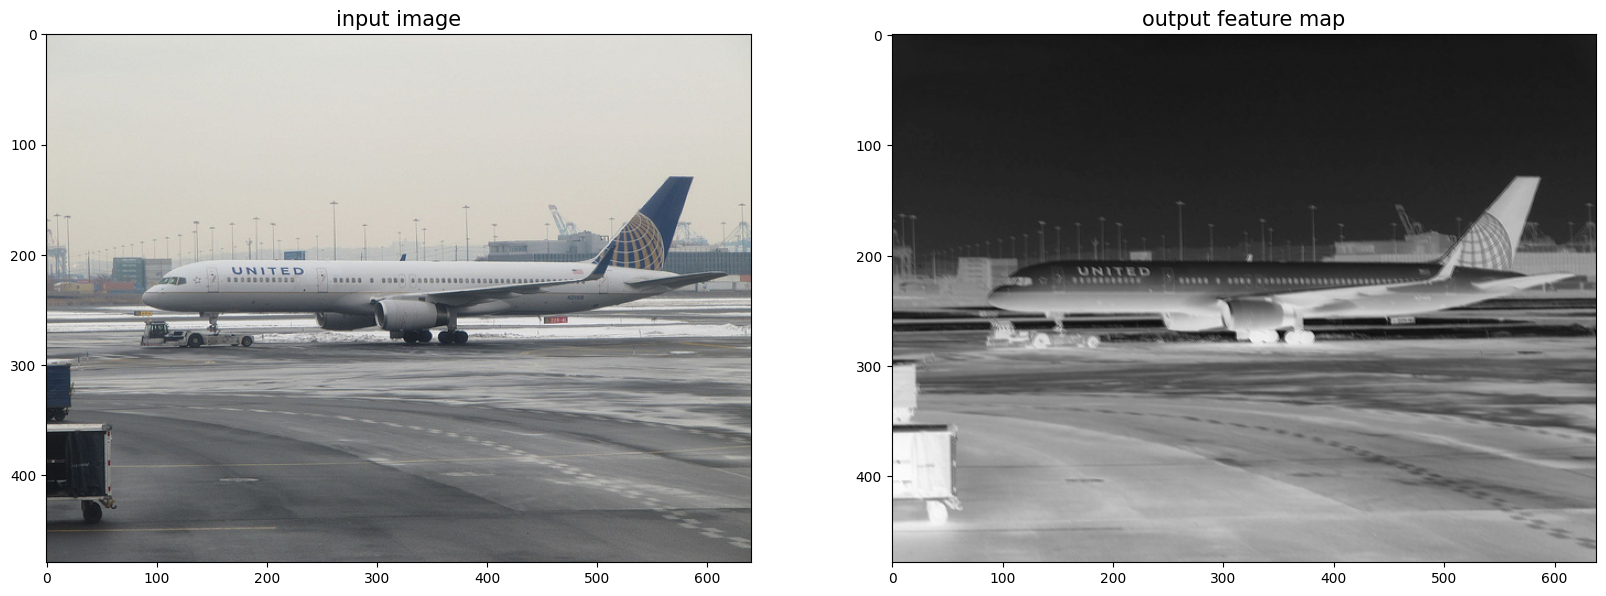

In [4]:
from PIL import Image

image=Image.open('000000098520.jpg')

#set the kernel parameters
#Laplace operator" or "Laplacian kernel"
w=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype='float32')/8
w=w.reshape([1,1,3,3])
# Since the number of input channels is 3, 
#adjust the shape of the convolution kernel from [1,1,3,3] to [1,3,3,3]
w=np.repeat(w,3,axis=0)

#create a convolutional operator, number of output channel is 1, size of kernel is 3x3
#use the above set value as initialization parameter
conv2=nn.Conv2d(in_channels=3, out_channels=1, kernel_size=(3,3))
with torch.no_grad():
  conv.weight=nn.Parameter(torch.tensor(w))


#convert the read image to float32
x=np.array(image).astype('float32')
#change the dimension of image [h,w,3], adjust the dimension of the channel to the front
x=np.transpose(x,(2,0,1))
#Reshape to [N,x,h,w]
x=x.reshape(1,3,image.height, image.width)
x= torch.from_numpy(x)
y=conv2(x)
out=y.detach().numpy()
plt.figure(figsize=(20, 10))
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(image)
f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')
plt.show()

The weight you specified forms a well-known kernel in image processing called the "Laplace operator" or "Laplacian kernel". This kernel is commonly used for edge detection in images. The idea of edge detection is to highlight the areas of an image where the intensity changes rapidly, which typically corresponds to object boundaries.

The choice of the values [-1,-1,-1],[-1,8,-1],[-1,-1,-1] is based on the concept of "second derivative" in calculus which measures the change in gradient or "rate of change". In the context of an image, rapid changes in intensity signify the presence of an edge.

- The `-1` values: These target the pixel's immediate neighborhood (up, down, left, right, and diagonals). They will subtract the neighboring pixel values from the central pixel, emphasizing transitions.
   
- The `8` in the middle: This targets the pixel itself. When you subtract the sum of the neighbors from 8 times the central pixel, the result is a measure of the second derivative in the intensity.

In a nutshell, this specific kernel gives a high response at edges (where pixel intensity changes quickly) and a low response in areas of uniform intensity.

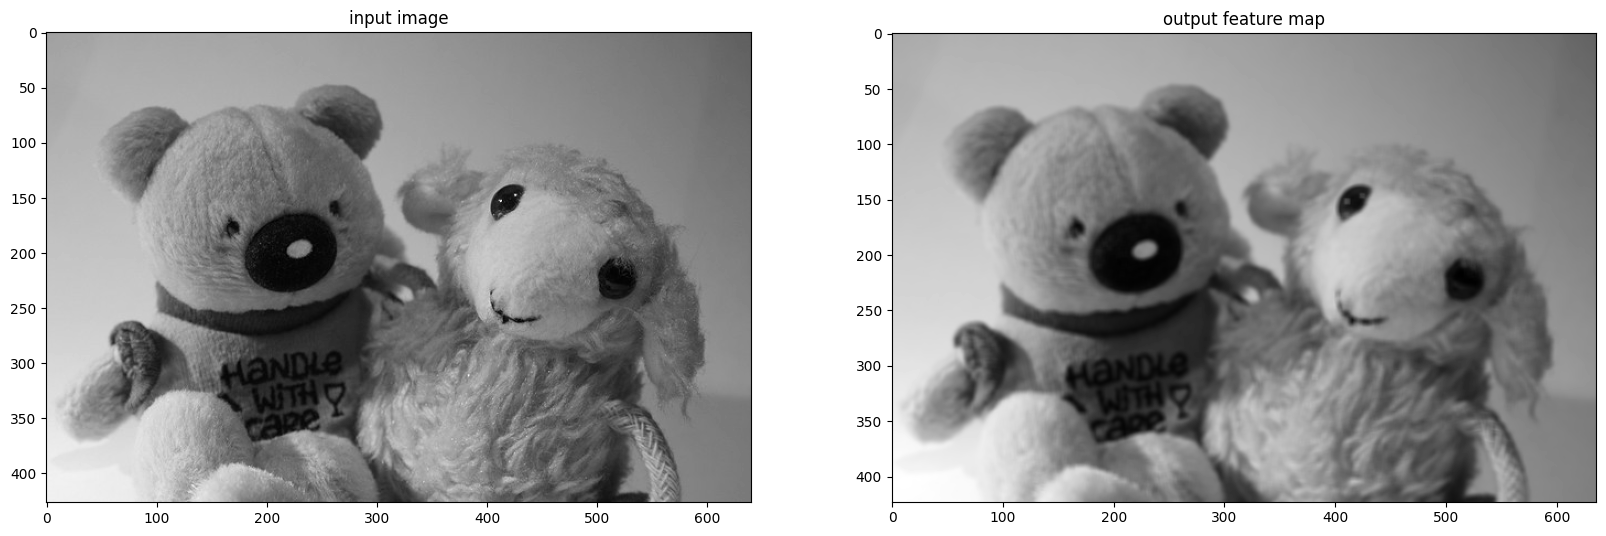

In [5]:
#converting it to grayscale with the convert('L') function. 
#The 'L' mode stands for luminance, which represents the image in grayscale.
img=Image.open('000000355610.jpg').convert('L')
img=np.array(img)
#mean filter
w=np.ones([1,1,5,5],dtype='float32')/25
conv=nn.Conv2d(in_channels=1, out_channels=1,kernel_size=(3,3))
with torch.no_grad():
  conv.weight=nn.Parameter(torch.tensor(w))

x=img.astype('float32')
x=x.reshape(1,1,img.shape[0],img.shape[1])
y=conv(torch.tensor(x))
out=y.detach().numpy()

plt.figure(figsize=(20, 12))
f = plt.subplot(121)
f.set_title('input image')
plt.imshow(img, cmap='gray')

f = plt.subplot(122)
f.set_title('output feature map')
out = out.squeeze()
plt.imshow(out, cmap='gray')

In this code, `w=np.ones([1,1,5,5],dtype='float32')/25`, the `np.ones([1,1,5,5],dtype='float32')` generates a 4-dimensional array filled with ones, with each dimension of size 1, 1, 5, and 5 respectively.

1. The first dimension, 1, corresponds to the number of output channels.
2. The second dimension, 1, corresponds to the number of input channels.
3. The third and fourth dimensions, 5 and 5, define the height and width of the convolutional kernel respectively.

Now, why are we using these values?

1. We are using `1` for the number of input and output channels because we are working with a grayscale image which has only one color channel.
2. The `5` in the height and width of the kernel specifies a 5x5 kernel. This size is commonly used in convolutional neural networks as it is large enough to capture patterns in the input data but not so large as to be computationally expensive. 

The kernel is then divided by 25 (`/25`) to normalize it. This results in an average (mean) filter. This kernel will replace each pixel value in the image with the average value of its neighbors, effectively blurring the image. The reason for using 25 is because the kernel size is 5x5, and 5*5 equals 25. When convolving this kernel with the image, each pixel in the output image represents the average of a 5x5 area from the input image, hence implementing a blur (smoothing) operation.

In PyTorch, `torch.nn.Parameter` is a kind of Tensor that is to be considered a module parameter. 

Parameters are Tensor subclasses, which have a very special property when used with `Module` - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear, for example, in `Module.parameters()` iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state (more on this later) in the model. If there was no such class as `Parameter`, these temporaries would get registered too.

Another difference is that parameters cannot be volatile and, compared to plain Tensors, they have a `requires_grad` property set to `True` by default.

Here is an example of how it is used:

```python
import torch
from torch import nn

class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(10, 10)) for i in range(10)])

    def forward(self, x):
        # ParameterList can act as an iterable, or be indexed using ints
        for i, p in enumerate(self.params):
            x = self.params[i // 2].mm(x) + p.mm(x)
        return x
```

In this example, `nn.Parameter(torch.randn(10, 10))` creates a tensor with dimensions [10, 10] filled with values from a normal distribution, and makes it a parameter, which means it will be included in the list of parameters to be updated during backpropagation when training the model.

# Pooling
Pooling is an operation commonly used in convolutional neural networks (CNNs) to reduce the spatial size (i.e., width and height) of the representation, to reduce the amount of parameters and computation in the network, and hence to also control overfitting.

There are several types of pooling operations, but the most common ones are max pooling and average pooling.

1. **Max Pooling:** Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

2. **Average Pooling:** Average pooling calculates the average value for each patch on the input feature map. 

Both of these operations can be beneficial depending on the case: max pooling could be used to look for the presence of a certain feature in various parts of the entire input, while average pooling could be used to take into account the average existence of a feature.

These pooling operations are usually performed with small filters (e.g., 2x2 or 3x3) and stride equal to the filter size to avoid overlapping regions. 

Let's take an example of Max Pooling operation with filter size 2x2, stride 2:

```
Input:
[[1, 1, 2, 4],
 [5, 6, 7, 8],
 [3, 2, 1, 0],
 [1, 2, 3, 4]]

Applying max pooling with 2x2 filter and stride 2:
[[6, 8],
 [3, 4]]
```

As you can see, the dimensions of the input are reduced by half, and each value in the output is the maximum value in the 2x2 region in the input.
 
In PyTorch, pooling operations can be implemented using the `torch.nn.MaxPool2d` and `torch.nn.AvgPool2d` classes for max and average pooling respectively.


In addition to the most commonly used max pooling and average pooling, there are several other types of pooling methods used in convolutional neural networks (CNNs):

1. **Global Max Pooling:** Similar to max pooling but instead of selecting the maximum value from a specified window size, global max pooling selects the maximum value from the entire feature map. The output dimension will always be [1 x 1] regardless of the input size. This is often used as the last pooling layer to reduce spatial dimensions to a single value, which can then be connected to fully connected layers.

2. **Global Average Pooling (GAP):** Similar to global max pooling, global average pooling takes the average of all values in each channel of the feature map. GAP is often used in CNNs to reduce overfitting by minimizing the total number of parameters. It's also often used as the last layer in the network, before the final classification layer.

3. **Fractional Max Pooling:** Fractional max pooling works similarly to max pooling but instead of having a fixed pooling window (e.g., 2x2, 3x3), the window sizes are generated randomly for each input in a given range. This introduces a form of stochasticity and can help improve model performance.

4. **LP Pooling:** LP Pooling is a more generalized pooling method where each pooling unit computes a Lebesgue p-norm of a input fragment. Max pooling and average pooling are special cases of LP pooling. When p approaches infinity, LP pooling becomes max pooling, and when p approaches 1, LP pooling becomes average pooling.

5. **Mixed Pooling:** Mixed pooling alternates between max pooling and average pooling within each pooling region. This combines the benefits of both types of pooling.

6. **Spatial Pyramid Pooling (SPP):** The spatial pyramid pooling layer can handle inputs of varying sizes. It partitions the input image into a set of bins with different sizes and applies max pooling to each bin. So, regardless of the input image size, the output dimension of the SPP layer remains fixed.

Remember, the choice of pooling method would depend on the specific requirements of your task and the architecture of your network.

# Activation Function
An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a neuron. It's used to introduce non-linearity into the output of a neuron, which helps the network learn more complex patterns.

Without a non-linear activation function, a neural network, regardless of the number of layers it has, would behave just like a single-layer neural network because the composition of linear functions is still a linear function.

There are several types of activation functions used in neural networks:

1. **Sigmoid Function:** The sigmoid function maps any value into a range between 0 and 1. It is useful in models where we need to predict the probability as an output.

2. **Tanh Function:** The tanh (hyperbolic tangent) function maps any value into range between -1 and 1. It is zero-centered, which makes it easier to model inputs that have strongly negative, neutral, and strongly positive values.

3. **ReLU (Rectified Linear Unit) Function:** The ReLU function gives an output of 0 if the input is less than 0, and if input is greater than 0, the output will be equal to the input. It introduces sparsity in the activations and helps alleviate the vanishing gradient problem in deep networks, which makes it widely used in deep learning models.

4. **Leaky ReLU Function:** This function attempts to solve the dying ReLU problem where neurons can sometimes be stuck in the negative state and always output 0. Leaky ReLU allows a small, non-zero gradient when the input is less than 0.

5. **Softmax Function:** The softmax function is often used in the output layer of a neural network-based classifier. It turns logits (numeric output of the last linear layer of a multi-class classification neural network) into probabilities that sum to 1.

6. **Swish Function:** Swish is a newer activation function introduced by Google. It is a self-gated activation function and has been found to perform better in deep networks compared to ReLU.

These activation functions are key to the successful learning process of neural networks, and the choice of activation function can have a significant impact on the performance of the model.

* **Problems**:
1. **Range:** This refers to the set of possible output values for the function.

2. **Monotonic:** A function is monotonic if it only moves in one direction (either always increases or always decreases) for all x in its domain.

3. **Continuous:** A function is continuous if there are no jumps, breaks, or holes in the graph of the function for all x in its domain.

4. **Vanishing Gradient:** This is a problem where the gradient is very small, causing the weights and biases of the earlier layers in deep neural networks to learn very slowly or stop learning altogether.

5. **Exploding Gradient:** This is the opposite problem of the vanishing gradient problem. Here, the gradient is too large, causing the weights and biases to update in potentially massive jumps.

6. **Saturation:** Saturation in the context of an activation function occurs when the activation function squashes its input into a very narrow range, often causing problems with the learning process.

7. **Dead Neurons:** In the context of ReLU and its variants, a dead neuron is a neuron that only outputs 0 for any input. This usually happens when the inputs to the neuron are always negative.

Let's now discuss these terms in the context of the activation functions mentioned earlier:

1. **Sigmoid Function:** The range is between 0 and 1. It is monotonic and continuous. However, it suffers from the vanishing gradient problem because its gradient becomes very small when the absolute value of its input is large. It can also suffer from saturation.

2. **Tanh Function:** The range is between -1 and 1. It is monotonic and continuous. It suffers less from the vanishing gradient problem than the sigmoid function but can still have issues when the absolute value of its input is large.

3. **ReLU (Rectified Linear Unit) Function:** The range is between 0 and infinity. It is monotonic and almost everywhere continuous (except at 0). It solves the vanishing gradient problem for positive inputs, but it can suffer from the dead neuron problem, where some neurons never activate if the input is negative.

4. **Leaky ReLU Function:** It has the same range as ReLU and is also monotonic. It solves the dead neuron problem by allowing small negative values when the input is less than zero.

5. **Softmax Function:** The range is between 0 and 1, and all outputs sum to 1. It's not monotonic or continuous. It doesn't suffer from vanishing or exploding gradient problems directly, but it can lead to numerical instability.

6. **Swish Function:** The range is between negative infinity and infinity. It is continuous and almost everywhere monotonic. It has been found to perform better in deep networks compared to ReLU.

These characteristics of activation functions influence how well a neural network can learn during training. The vanishing and exploding gradient problems, for instance, can severely hamper the learning process in a deep neural network. Similarly, the problem of dead neurons can lead to underutilization of the network's capacity. On the other hand, the continuity and monotonicity of an activation function can be beneficial for the convergence of the learning algorithm.

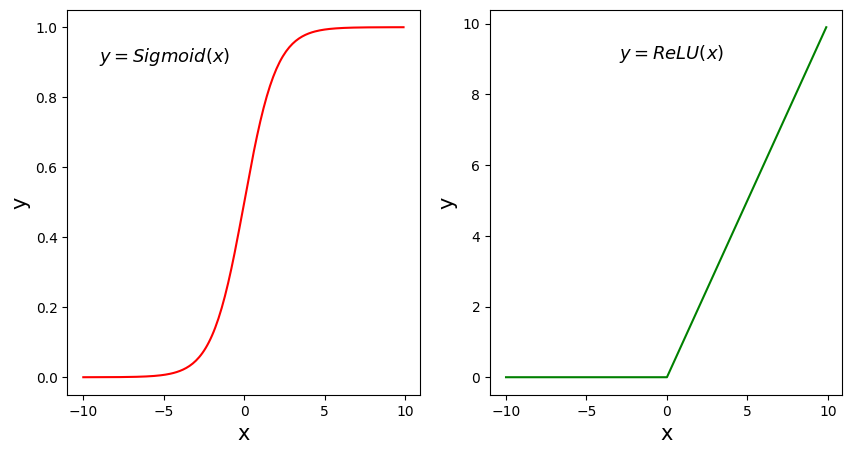

In [6]:
# ReLU和Sigmoid激活函数示意图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.figure(figsize=(10, 5))

# 创建数据x
x = np.arange(-10, 10, 0.1)

# 计算Sigmoid函数
s = 1.0 / (1 + np.exp(0. - x))

# 计算ReLU函数
y = np.clip(x, a_min=0., a_max=None)

#####################################
# 以下部分为画图代码
f = plt.subplot(121)
plt.plot(x, s, color='r')
currentAxis=plt.gca()
plt.text(-9.0, 0.9, r'$y=Sigmoid(x)$', fontsize=13)
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

f = plt.subplot(122)
plt.plot(x, y, color='g')
plt.text(-3.0, 9, r'$y=ReLU(x)$', fontsize=13)
currentAxis=plt.gca()
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

plt.show()

# Batch Normalization
Batch Normalization (BatchNorm) is a technique designed to automatically standardize the inputs to a layer in a deep learning model. It was introduced by Sergey Ioffe and Christian Szegedy in a 2015 paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift".

The technique has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

The core idea behind BatchNorm is to normalize the inputs in each mini-batch so that they have a mean output activation of zero and standard deviation of one. This is akin to the standardization process often applied to input data in a machine learning model, i.e., standardizing the inputs so that they have a zero mean and unit variance.

Batch Normalization has been found to have several benefits:

1. **Improves gradient flow through the network:** During the training of deep networks, the distribution of each layer’s inputs changes because the weights of the previous layer change. This is called internal covariate shift. BatchNorm reduces the amount of internal covariate shift by normalizing the input.

2. **Allows higher learning rates:** Gradient descent usually requires small learning rates for the network to converge. BatchNorm helps to allow the use of much higher learning rates, accelerating the learning process.

3. **Reduces the strong dependence on initialization:** Deep networks are usually quite sensitive to the initialization of their parameters. BatchNorm makes the network less sensitive to the initialization of the weights.

4. **Acts as a form of regularization and slightly reduces the need for dropout:** BatchNorm adds some noise to the network. In this way, it has a slight regularizing effect. As such, the use of dropout (another regularizing technique) may be reduced.

The typical usage of Batch Normalization in PyTorch looks like this:

```python
nn.BatchNorm2d(num_features)
```

Where `num_features` is the number of output feature maps from the convolutional layer.

This is usually applied directly after the linear or convolutional layers, and before the activation function.

Batch Normalization (BatchNorm) operates on a whole mini-batch of data at once and performs a series of steps to normalize the data:

1. Compute the mean for each mini-batch:For each mini-batch, calculate the mean of the inputs/features. Note that this is not the mean of the entire dataset, but the mean of the batch. This is done separately for each individual feature (or channel in the case of images).

    ```
    µ_B = (1/m) * Σx_i
    ```

    Where:
    - m is the batch size
    - x_i are the inputs in the batch
    - µ_B is the mean of the batch

2. Compute the variance for each mini-batch:For each mini-batch, calculate the variance of the inputs/features. Like with the mean, this is done separately for each individual feature or channel.

    ```
    σ²_B = (1/m) * Σ(x_i - µ_B)²
    ```

    Where:
    - m is the batch size
    - x_i are the inputs in the batch
    - µ_B is the mean of the batch
    - σ²_B is the variance of the batch

3. Normalize the batch: Subtract the mini-batch mean and divide by the square root of the mini-batch variance plus a small epsilon value (for numerical stability). This ensures that the data for each feature in the batch has zero mean and unit variance.

    ```
    x̂_i = (x_i - µ_B) / √(σ²_B + ε)
    ```

    Where:
    - x_i are the inputs in the batch
    - µ_B is the mean of the batch
    - σ²_B is the variance of the batch
    - ε is a constant for numerical stability
    - x̂_i is the normalized output

4. Scale and Shift: The normalized data is then scaled by a learned parameter (gamma, "γ") and shifted by another learned parameter (beta, "β"). These parameters give the model the ability to undo the normalization step if it decides that it's necessary. They are learned during backpropagation.

    ```
    y_i = γ * x̂_i + β = BN_γ,β(x_i)
    ```

    Where:
    - x̂_i is the normalized output
    - γ is a scale parameter
    - β is a shift parameter
    - y_i is the final output after scale and shift
    - BN_γ,β(x_i) represents the Batch Normalization operation applied to input x_i with scale factor γ and shift β

In summary, Batch Normalization normalizes the activations of the network (makes the mean activation close to 0 and the activation standard deviation close to 1), which allows each layer to learn on a more stable distribution of inputs, and thus speeds up the training of the network.

In [7]:
#[N,K]
data=np.array([[1,2,3],[4,5,6],[7,8,9]]).astype('float32')
# Initialize a BatchNorm1D Layer
# The number of features 'num_features' is equal to the second dimension of input data
bn=nn.BatchNorm1d(num_features=3)
y=bn(torch.tensor(data))
print('output of BatchNorm1D Layer: \n {}'.format(y))

# Calculate the mean, standard deviation and normalized output using Numpy for the first feature
# Here, we validate the first feature
a = np.array([1,4,7])
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std

print('mean {}, std {}, \n output {}'.format(a_mean, a_std, b))

output of BatchNorm1D Layer: 
 tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)
mean 4.0, std 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]


In [8]:
#[N,C,H,W]
#Batch normalization in neural networks helps to standardize the inputs and prevent internal covariate shift.
np.random.seed(100)
data=np.random.rand(2,4,3,3).astype('float32')
#num_feature is the channel sizd
bn=nn.BatchNorm2d(num_features=4)
y=bn(torch.tensor(data))
print('input of BatchNorm2D Layer: \n {}'.format(x))
print('output of BatchNorm2D Layer: \n {}'.format(y))

a=data[:,0,:,:]
a_mean=a.mean()
a_std=a.std()
b=(a-a_mean)/a_std
print('channel 0 of input data: \n {}'.format(a))
print('std {}, mean {}, \n output: \n {}'.format(a_mean, a_std, b))

input of BatchNorm2D Layer: 
 [-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000

Batch Normalization (BatchNorm) has several variants that have been proposed to address different scenarios and challenges in normalization. Here are three commonly used variants:

1. **Layer Normalization (LN):** Layer Normalization, introduced by Jimmy Lei Ba et al. in 2016, aims to normalize the activations within a layer(channel) rather than across the batch dimension. LN calculates the mean and variance over all the elements in the feature map of a layer. This makes LN more suitable for recurrent neural networks (RNNs) and other models where the batch size may vary or is not applicable. LN helps in stabilizing the training process and improving generalization.(not related to batch size)

2. **Group Normalization (GN):** Group Normalization, proposed by Yuxin Wu and Kaiming He in 2018, addresses the limitations of BatchNorm in scenarios where the batch size is small or when the batch size is not well-suited for normalization. GN divides the channels of the input into groups and performs normalization independently within each group. This allows for more stable normalization even with small batch sizes. GN has been shown to be effective for various computer vision tasks, especially when the batch size is limited.(not related to batch size)

3. **Instance Normalization (IN):** Instance Normalization, introduced by Dmitry Ulyanov et al. in 2016, is designed specifically for style transfer and image-to-image translation tasks. IN normalizes the activations across each individual sample in the batch, treating each sample as a separate "instance". It is commonly used in tasks where spatial information is important, such as image generation or style transfer, as it normalizes the features within each image independently.(only [h,w])

These variants of normalization techniques provide alternatives to BatchNorm and offer different benefits in different scenarios. They help to overcome the limitations of BatchNorm and provide more flexibility and stability in normalization, especially in cases where the assumptions of batch-based normalization may not hold or are not applicable. The choice of which normalization technique to use depends on the specific requirements of the task, the architecture of the model, and the available training data.

# Dropout
Dropout is a regularization technique commonly used in deep learning models to prevent overfitting. It was introduced by Geoffrey Hinton et al. in 2012 as a way to reduce the interdependencies between neurons and improve the generalization capability of neural networks.

During training, dropout randomly sets a fraction of the input units (neurons) to zero at each update. This means that these units are "dropped out" temporarily from the network, hence the name "dropout." The dropped-out units do not contribute to the forward pass and do not receive any gradients during backpropagation.

Here's how dropout works:

1. **Training Phase:** During training, for each mini-batch, dropout is applied to the input or intermediate layer of the neural network. The dropout rate is a hyperparameter that determines the probability of a neuron being dropped out (typically between 0.2 and 0.5).

2. **Forward Pass:** During the forward pass, the output of the layer with dropout is multiplied element-wise by a binary mask, which randomly sets some units to zero and scales the remaining units by a factor of `1/(1 - dropout_rate)` to maintain the expected sum of the units.

3. **Backward Pass:** During backpropagation, only the non-dropped-out units receive gradients, and the gradients are scaled by the same factor as in the forward pass.

Dropout is commonly used in deep learning models for several reasons:

1. **Regularization:** Dropout acts as a regularization technique to prevent overfitting. Overfitting occurs when a model learns to fit the training data too closely, resulting in poor generalization to unseen data. Dropout introduces noise and randomness in the network by temporarily disabling a fraction of neurons during training, reducing the interdependencies between them. This encourages the network to learn more robust features and prevents it from relying too heavily on specific neurons.

2. **Reducing Co-Adaptation:** Neurons in a neural network can co-adapt to specific input patterns. This co-adaptation can lead to overfitting, where the network becomes overly specialized to the training data. Dropout breaks up these co-adaptations by randomly dropping out neurons, forcing the network to learn more robust and generalizable features.

3. **Ensemble Effect:** Dropout can be seen as training multiple models in parallel. During training, different subsets of neurons are dropped out, effectively creating different sub-networks within the overall network. Each sub-network learns to make predictions independently, and during inference, the predictions from all the sub-networks are combined (averaged). This ensemble effect helps to improve the model's performance and generalization by reducing the impact of individual neurons or sub-networks.

4. **Preventing Overfitting in Small Datasets:** Dropout is particularly useful when working with small datasets. In small datasets, the risk of overfitting is higher due to limited variability in the data. Dropout can help prevent overfitting in such cases by adding noise and introducing more diversity during training.

5. **Efficient Training:** Dropout is computationally efficient during training. It does not require any additional computations during inference, as the full network is used for making predictions. The dropout layers are only active during training, randomly dropping out neurons and updating the network parameters accordingly.

In PyTorch, dropout can be implemented using the `nn.Dropout` module. You can specify the dropout rate as a parameter when creating a dropout layer.

When using dropout during training, a new issue may arise during the prediction phase. Since dropout randomly drops out a fraction of neurons during training, the total size of the output data may become smaller compared to the input data. This can cause a mismatch in the shapes of the input and output data during prediction, leading to errors or inconsistencies.

To solve this issue, you can apply a technique called "inverted dropout" during the prediction phase. In inverted dropout, the weights of the neurons that were dropped out during training are scaled by the dropout probability during inference.

Here's how you can apply inverted dropout during prediction:

1. During training:
   - Apply dropout to the input or intermediate layer using `nn.Dropout`.
   - Adjust the scaling factor during training automatically.

2. During prediction:
   - Disable dropout by setting the `model.eval()` mode. This turns off the dropout mechanism.
   - Scale the weights of the remaining neurons by the inverted dropout probability used during training.

Here's an example of how to apply inverted dropout during prediction using PyTorch:

```python
import torch
import torch.nn as nn

# Create a dropout layer with dropout probability p
dropout_prob = 0.5
dropout_layer = nn.Dropout(p=dropout_prob)

# Training phase
model.train()
output_train = dropout_layer(input_data)

# Prediction phase
model.eval()
with torch.no_grad():
    output_pred = dropout_layer(input_data) / (1 - dropout_prob)
```

In this code, the `model.train()` and `model.eval()` methods are used to switch between the training and prediction modes, respectively. During training, the dropout layer is active and applies dropout to the input data. During prediction, the dropout layer is turned off (`model.eval()`) and the weights of the remaining neurons are scaled by the inverted dropout probability (`1 / (1 - dropout_prob)`) to ensure the correct output scaling.

By using inverted dropout during prediction, you can maintain consistency in the size of the output data and ensure proper functioning of the model in prediction scenarios.

In PyTorch, the `nn.Dropout` module does not have a built-in option for downscaling or upscaling during training and inference. However, you can manually achieve similar effects by scaling the output during inference using custom logic.

Here's an example of how you can achieve downscaling during inference with dropout in PyTorch:

```python
import torch
import torch.nn as nn

# Create a dropout layer with dropout probability p
dropout_prob = 0.5
dropout_layer = nn.Dropout(p=dropout_prob)

# Training phase
model.train()
output_train = dropout_layer(input_data)

# Prediction phase
model.eval()
with torch.no_grad():
    output_pred = dropout_layer(input_data) * (1 - dropout_prob)
```

In this code, during training, the dropout layer is active and applies dropout to the input data (`output_train`). During prediction, the dropout layer is turned off (`model.eval()`), and the output is scaled by the inverse dropout probability (`1 - dropout_prob`) to achieve downscaling (`output_pred`).

For upscaling during training and no scaling during prediction, you can directly use the output of the dropout layer during inference without any additional scaling.

It's important to note that these scaling techniques are not directly built into the PyTorch `nn.Dropout` module. You would need to implement the desired scaling logic yourself based on your specific requirements.

In [9]:
np.random.seed(100)
# Create data [N, C, H, W] for convolutional layer output
data1 = np.random.rand(2, 3, 3, 3).astype('float32')
# Create data [N, K] for fully connected layer output
data2=np.arange(1,13).reshape([-1,3]).astype('float32')

# Dropout with downscale_in_infer mode for convolutional layer output
drop11 = nn.Dropout(p=0.5)
droped_train11 = drop11(torch.tensor(data1))
drop11.eval()
droped_eval11 = drop11(torch.tensor(data1))

# Dropout with upscale_in_train mode for convolutional layer output
drop12 = nn.Dropout(p=0.5)
droped_train12 = drop12(torch.tensor(data1))
drop12.eval()
droped_eval12 = drop12(torch.tensor(data1))

# Dropout with downscale_in_infer mode for fully connected layer output
drop21 = nn.Dropout(p=0.5)
droped_train21 = drop21(torch.tensor(data2))
drop21.eval()
droped_eval21 = drop21(torch.tensor(data2))

# Dropout with upscale_in_train mode for fully connected layer output
drop22 = nn.Dropout(p=0.5)
droped_train22 = drop22(torch.tensor(data2))
drop22.eval()
droped_eval22 = drop22(torch.tensor(data2))

# Print the results
print('x1:\n', data1)
print('droped_train11:\n', droped_train11)
print('droped_eval11:\n', droped_eval11)
print('droped_train12:\n', droped_train12)
print('droped_eval12:\n', droped_eval12)

print('x2:\n', data2)
print('droped_train21:\n', droped_train21)
print('droped_eval21:\n', droped_eval21)
print('droped_train22:\n', droped_train22)
print('droped_eval22:\n', droped_eval22)

x1:
 [[[[0.54340494 0.2783694  0.4245176 ]
   [0.84477615 0.00471886 0.12156912]
   [0.67074907 0.82585275 0.13670659]]

  [[0.5750933  0.89132196 0.20920213]
   [0.18532822 0.10837689 0.21969749]
   [0.9786238  0.8116832  0.17194101]]

  [[0.81622475 0.27407375 0.4317042 ]
   [0.9400298  0.81764936 0.33611196]
   [0.17541045 0.37283206 0.00568851]]]


 [[[0.25242636 0.7956625  0.01525497]
   [0.5988434  0.6038045  0.10514768]
   [0.38194343 0.03647606 0.89041156]]

  [[0.98092085 0.05994199 0.89054596]
   [0.5769015  0.7424797  0.63018394]
   [0.5818422  0.02043913 0.21002658]]

  [[0.5446849  0.76911515 0.25069523]
   [0.2858957  0.8523951  0.9750065 ]
   [0.8848533  0.35950786 0.59885895]]]]
droped_train11:
 tensor([[[[1.0868, 0.5567, 0.8490],
          [0.0000, 0.0094, 0.0000],
          [1.3415, 1.6517, 0.2734]],

         [[1.1502, 0.0000, 0.0000],
          [0.3707, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[1.6324, 0.5481, 0.0000],
          [0.0000, 0.00

Dropout has several variants that have been proposed to enhance its performance or address specific challenges in different scenarios. Here are some variants of Dropout:

1. **Spatial Dropout:** Spatial Dropout, introduced by Tomas G. Dietterich and Gavin E. Hinton in 2012, extends the concept of Dropout to the spatial dimensions of feature maps in convolutional neural networks (CNNs). In addition to dropping out individual neurons, Spatial Dropout drops entire feature maps, which helps regularize the model and prevent overfitting.

2. **DropConnect:** DropConnect, proposed by Li Wan et al. in 2013, is an extension of Dropout that applies the dropout technique to the weights of a neural network instead of its activations. DropConnect randomly sets a fraction of weights to zero during training, reducing interconnections between neurons and preventing overfitting. During testing, all weights are used, but they are scaled by the dropout probability to account for the missing connections.

3. **Zoneout:** Zoneout, introduced by Lstm Cell et al. in 2016, is a variant of Dropout specifically designed for recurrent neural networks (RNNs). Instead of dropping out individual neurons, Zoneout randomly sets a fraction of hidden unit activations to their previous values at each time step during training. Zoneout helps in regularizing RNNs and preventing overfitting while preserving the temporal dependencies learned by the network.

4. **DropBlock:** DropBlock, proposed by Golnaz Ghiasi et al. in 2018, is a regularization technique designed for convolutional neural networks. DropBlock randomly sets entire spatial blocks of feature maps to zero during training, similar to Spatial Dropout. By dropping contiguous regions of activations, DropBlock encourages the network to learn more diverse and robust features.

These variants of Dropout offer modifications and extensions to the original Dropout technique, providing additional regularization capabilities or targeting specific types of neural networks. They have been shown to be effective in improving model performance and generalization across various tasks and architectures.

It's worth noting that not all Dropout variants are available in every deep learning framework by default. However, many frameworks offer extensions or custom implementations of these variants that can be used to incorporate them into your models.

In [10]:
class SimpleNet(nn.Module):
  def __init__(self,num_classes=1):
    super(SimpleNet,self).__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=2)
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=2)
    self.max_pool2 = nn. MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(in_features=50176, out_features=64)
    self.fc2 = nn.Linear(in_features=64, out_features=num_classes)        

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.max_pool1(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.max_pool2(x)
    x = x.view(x.size(0),-1)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    return x

In [11]:
model = SimpleNet()
print(model)


SimpleNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


In [12]:
from torchsummary import summary

model = SimpleNet()
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 224, 224]             456
         MaxPool2d-2          [-1, 6, 112, 112]               0
            Conv2d-3         [-1, 16, 112, 112]           2,416
         MaxPool2d-4           [-1, 16, 56, 56]               0
            Linear-5                   [-1, 64]       3,211,328
            Linear-6                    [-1, 1]              65
Total params: 3,214,265
Trainable params: 3,214,265
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 4.79
Params size (MB): 12.26
Estimated Total Size (MB): 17.62
----------------------------------------------------------------


The super() function is used in object-oriented programming to refer to the parent class or superclass. In the context of defining a class in Python, calling super().__init__() allows you to invoke the initializer of the parent class.

In [16]:
model = SimpleNet()
input_shape = (10, 3, 224, 224)

for name, module in model.named_children():
    if isinstance(module, nn.Conv2d or nn.MaxPool2d or nn.Linear):
        print(f"{name}:")
        print("Input shape:", input_shape)
        print("Kernel size:", module.kernel_size)
        print("Output channels:", module.out_channels)
        print("Padding:", module.padding)
        print("Stride:", module.stride)
        output_shape = module(torch.zeros(input_shape)).shape
        print("Output shape:", output_shape)
        print("Parameter shape:", tuple(module.parameters())[0].shape)
        print()
        input_shape = output_shape


conv1:
Input shape: (10, 3, 224, 224)
Kernel size: (5, 5)
Output channels: 6
Padding: (2, 2)
Stride: (1, 1)
Output shape: torch.Size([10, 6, 224, 224])
Parameter shape: torch.Size([6, 3, 5, 5])

conv2:
Input shape: torch.Size([10, 6, 224, 224])
Kernel size: (5, 5)
Output channels: 16
Padding: (2, 2)
Stride: (1, 1)
Output shape: torch.Size([10, 16, 224, 224])
Parameter shape: torch.Size([16, 6, 5, 5])



In [17]:
model = SimpleNet()
input_shape = (10, 3, 224, 224)

for name, module in model.named_children():
    if isinstance(module, nn.Linear):
        print(f"{name}:")
        print("Input shape:", input_shape)
        print("Output shape:", module.out_features)
        print("Parameter shape:", tuple(module.parameters())[0].shape)
        print()
        input_shape = (input_shape[0], module.out_features)


fc1:
Input shape: (10, 3, 224, 224)
Output shape: 64
Parameter shape: torch.Size([64, 50176])

fc2:
Input shape: (10, 64)
Output shape: 1
Parameter shape: torch.Size([1, 64])

